In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Use ipywidgets to create the drop downs
import ipywidgets as widgets

In [3]:
# set the display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
# read cleaned data

df= pd.read_csv('Cleaned FIFA 2021 data.csv')
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Positions,Height (cm),Weight (kg),Preferred Foot,BOV,Best Position,Joined,Value (€),Wage (€),Release Clause (€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Name in Long Name,BestPosition in Position,Contract Start,Contract End,Contract Type,Playing Years
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,True,True,2004,2021,On Contract,19
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018-07-10,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,True,True,2018,2022,On Contract,5
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,2014-07-16,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,True,True,2014,2023,On Contract,9
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015-08-30,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,True,True,2015,2023,On Contract,8
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017-08-03,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,True,True,2017,2022,On Contract,6


### 1. Contract Types

Text(0, 0.5, 'Total')

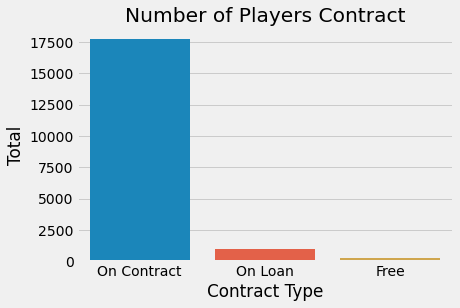

In [7]:
# count type of contracts and visualize

sns.countplot(x = df['Contract Type'] )
plt.title('Number of Players Contract')
plt.ylabel('Total')

### 2. View Clubs and different nationality with Name(x) -Age, hits, foot p.,best position 

In [10]:
# Pick needed columns

clubs = df[['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Best Position', 'Hits' ]]

In [11]:
pivot = pd.pivot_table(clubs, values=['Age', 'Hits'], index=['Club', 'Nationality', 'Name'])

In [450]:
#sel_col = widgets.Dropdown(options = club)

#### 2.1

In [ ]:
pivot2 = pd.pivot_table(clubs, values=['Hits'], index=['Club', 'Name', 'Best Position', 'Preferred Foot'])

In [8]:
#1 working 

All = 'All'

def unique_sorted(array):
    unique = array.sort_values().unique().tolist()
    #unique.sort()
    unique.insert(0, All)
    return unique

club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']))
nat_select = widgets.Dropdown(options=unique_sorted(clubs['Nationality']))

In [ ]:
#3 working 

output = widgets.Output()
plot_output = widgets.Output()

club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']))
nat_select = widgets.Dropdown(options=unique_sorted(clubs['Nationality']))
plot_select =  widgets.Dropdown(options=['Age', 'Hits'], description='Plot')

def club_nat_filter(club, nationality, plot):
    output.clear_output()
    plot_output.clear_output()
    
    if (club == All) & (nationality == All):
        club_nat = clubs
        
    elif (club == All):
        club_nat = clubs[clubs['Nationality'] == nationality]
        
    elif (nationality == All):
        club_nat = clubs[clubs['Club'] == club]
        
    else:
        club_nat = clubs[(clubs['Club'] == club) & (clubs['Nationality'] == nationality)]
        
    with output:
        display(club_nat)
        
    with plot_output:
        if plot == 'Age':
            sns.barplot(x = club_nat['Age'], y = club_nat['Name'])
            plt.show()
        elif plot == 'Hits':
            sns.barplot(x = club_nat['Hits'], y = club_nat['Name'])
            plt.show()
            
def club_change(change):
    club_nat_filter(change.new, nat_select.value,plot_select.value)
    
def nat_change(change):
    club_nat_filter(club_select.value, change.new,plot_select.value)

def plot_change(change):
    club_nat_filter(club_select.value, nat_select.value,change.new)
    
        
club_select.observe(club_change, names = 'value')
nat_select.observe(nat_change, names = 'value')
plot_select.observe(plot_change, names = 'value')

input_widgets = widgets.HBox([club_select, nat_select, plot_select])

display(input_widgets)
display(output)
display(plot_output)

In [40]:
# working chatgpt not modified

output = widgets.Output()
plot_output = widgets.Output()

club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']))
nat_select = widgets.Dropdown(options=[])
plot_select =  widgets.Dropdown(options=['Age', 'Hits'], description='Plot')

def get_nationalities_in_club(club):
    output.clear_output()
    plot_output.clear_output()

    if club == 'All':
        return unique_sorted(clubs['Nationality'])
    else:
        return unique_sorted(clubs[clubs['Club'] == club]['Nationality'])

def club_nat_filter(club, nationality, plot):
    output.clear_output()
    plot_output.clear_output()
    
    if club == 'All':
        club_nat = clubs
        nat_options = get_nationalities_in_club('All')
    else:
        club_nat = clubs[clubs['Club'] == club]
        nat_options = get_nationalities_in_club(club)
    
    nat_select.options = nat_options
    
    if (nationality == 'All'):
        pass
    else:
        club_nat = club_nat[club_nat['Nationality'] == nationality]
        
    with output:
        display(club_nat)
        
    with plot_output:
        if plot == 'Age':
            sns.barplot(x = club_nat['Age'], y = club_nat['Name'])
            plt.show()
        elif plot == 'Hits':
            sns.barplot(x = club_nat['Hits'], y = club_nat['Name'])
            plt.show()
            
def club_change(change):
    club_nat_filter(change.new, 'All', plot_select.value)
    
def nat_change(change):
    club_nat_filter(club_select.value, change.new, plot_select.value)

def plot_change(change):
    club_nat_filter(club_select.value, nat_select.value, change.new)
    
        
club_select.observe(club_change, names='value')
nat_select.observe(nat_change, names='value')
plot_select.observe(plot_change, names='value')

nat_select.disabled = True

def enable_nat_select(change):
    if change.new == 'All':
        nat_select.disabled = True
    else:
        nat_select.disabled = False
        
club_select.observe(enable_nat_select, names='value')

input_widgets = widgets.HBox([club_select, nat_select, plot_select])

display(input_widgets)
display(output)

Output()

In [41]:
display(plot_output)

Output()

In [43]:
# working chatgpt modified

output = widgets.Output()
plot_output = widgets.Output()

club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']))
nat_select = widgets.Dropdown(options=unique_sorted(clubs['Nationality']))
plot_select =  widgets.Dropdown(options=['Age', 'Hits'], description='Plot')

def get_nationalities_in_club(club):
    output.clear_output()
    plot_output.clear_output()
    
    if club == 'All':
        return unique_sorted(clubs['Nationality'])
    else:
        return unique_sorted(clubs[clubs['Club'] == club]['Nationality'])

def club_nat_filter(club, nationality, plot):
    output.clear_output()
    plot_output.clear_output()
    
    if club == 'All':
        club_nat = clubs
        nat_options = get_nationalities_in_club('All')
    else:
        club_nat = clubs[clubs['Club'] == club]
        nat_options = get_nationalities_in_club(club)
    
    nat_select.options = nat_options
    
    if (nationality == 'All'):
        club_nat = clubs[clubs['Club'] == club]
    else:
        club_nat = clubs[(clubs['Club'] == club) & (clubs['Nationality'] == nationality)]
        
    with output:
        display(club_nat)
        
    with plot_output:
        if plot == 'Age':
            sns.barplot(x = club_nat['Age'], y = club_nat['Name'])
            plt.show()
        elif plot == 'Hits':
            sns.barplot(x = club_nat['Hits'], y = club_nat['Name'])
            plt.show()
            
def club_change(change):
    club_nat_filter(change.new, nat_select.value, plot_select.value)
    
def nat_change(change):
    club_nat_filter(club_select.value, change.new, plot_select.value)

def plot_change(change):
    club_nat_filter(club_select.value, nat_select.value, change.new)
    
        
club_select.observe(club_change, names='value')
nat_select.observe(nat_change, names='value')
plot_select.observe(plot_change, names='value')

input_widgets = widgets.HBox([club_select, nat_select, plot_select])


In [44]:
tab = widgets.Tab([output, plot_output])
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'Bar Plot')

dashboard = widgets.VBox([input_widgets, tab])
display(dashboard)

#item_layout = widgets.Layout(margin='0 0 50px 0')

In [ ]:
#chart 3

bound1 = widgets.BoundedIntText(min = 0, max = 60000, step = 5000, description = 'Wage (€) Start:', value = 0)
bound2 = widgets.BoundedIntText(min = 0, max = 60000, step = 5000, description = 'Wage (€) End:', value = 5000)

outputs = widgets.Output()

def dropdown_club(value,boundary):
    outputs.clear_output()
    if value <= boundary:
        worth = player_worth[(player_worth['Wage (€)'] >= value) & (player_worth['Wage (€)'] <= boundary)]
    
    with outputs:
        display(worth)

def bound_change(change):
    dropdown_club(change.new, bound2.value)
    
def bound2change(change):
    dropdown_club(bound1.value, change.new)
    
bound1.observe(bound_change, names = 'value')
bound2.observe(bound2change, names = 'value')


display(bound1)
display(bound2)
               
display(outputs)

In [ ]:
# chart 3 works

worth = 'worth'

output_worth = widgets.Output() # ouput of the widgets to be displayed 
plot_worthoutput = widgets.Output() # ouput of the selected graph to be displayed

select_club = widgets.Dropdown(options=unique_sorted(clubs['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
select_nat = widgets.Dropdown(options=unique_sorted(clubs['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
select_plot = widgets.Dropdown(options=['Release Clause (€)', 'worth'], description='Plot') # passes the columns to plot as options
bound1 = widgets.BoundedIntText(min = 0, max = 600000, step = 500, description = 'Wage (€) Start:', value = 0)
bound2 = widgets.BoundedIntText(min = 0, max = 600000, step = 5000, description = 'Wage (€) End:', value = 5000)
 
#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_player_worth(club):
    
    if club == 'All':
        # if club == All, return all unique Nationalities
        return unique_sorted(player_worth['Nationality']) 
    else:          
        # elif a unique club is selected, return unique Nationalities for club
        return unique_sorted(player_worth[player_worth['Club'] == club]['Nationality']) 
        

        
#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
        
def worth_filtering(club, nationality, value, boundary):
    output_worth.clear_output() # clears the ouput of the selected items when a new one is selected
    plot_worthoutput.clear_output() # clears the ouput of the selected graph when a new plot is selected
    
    if club == 'All':
        worth_filter = player_worth
        nat_options = get_nationalities_in_player_worth('All')  # if club_nat = clubs, return all unique Nationalities
    else:
        worth_filter = player_worth[player_worth['Club'] == club]  # elif a unique club is selected, return unique club
        nat_options = get_nationalities_in_player_worth(club)  # nat_options updates to unique Nationalities for club
    
    select_nat.options = nat_options # then passes nat_options as options for nat_select variable
    
    if nationality == 'All':
        pass # do nothing
    else:
        worth_filter = player_worth[(player_worth['Club'] == club) & (player_worth['Nationality'] == nationality)] # else All Clubs & Nationality
    
    if (club == 'All') & (value <= boundary):
        worth_filter = worth_filter[(worth_filter['Wage (€)'] >= value) & (worth_filter['Wage (€)'] <= boundary)]
        
    elif value <= boundary:
        worth_filter = worth_filter[(worth_filter['Wage (€)'] >= value) & (worth_filter['Wage (€)'] <= boundary)]
          
    with output_worth:
        display(worth_filter) # displays Output


def change_club(change):
    worth_filtering(change.new, select_nat.value, bound1.value, bound2.value)
    
def change_nat(change):
    worth_filtering(select_club.value, change.new, bound1.value, bound2.value)

def bound1_change(change):
    worth_filtering(select_club.value, select_nat.value, change.new, bound2.value)
    
def bound2_change(change):
    worth_filtering(select_club.value, select_nat.value,bound1.value, change.new)

select_club.observe(change_club, names = 'value')
select_nat.observe(change_nat, names = 'value')
bound1.observe(bound1_change, names='value')
bound2.observe(bound2_change, names = 'value')

select_nat.disabled = True # disables nat_select on default

def enable_select_nat(change):
    if change.new == 'All':
        select_nat.disabled = True # disables nat_select if club is All
    else:
        select_nat.disabled = False # enables nat_select when unique club is selected
    
select_club.observe(enable_select_nat, names='value') # observes enable_nat_select for changes


input_widget = widgets.HBox([select_club, select_nat,bound1,bound2])

display(input_widget)
display(output_worth)
        


In [56]:
# 3 works - finished

worth = 'worth'

output_worth = widgets.Output() # ouput of the widgets to be displayed 
worth_plot = widgets.Output() # ouput of the selected graph to be displayed

select_club = widgets.Dropdown(options=unique_sorted(player_worth['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
select_nat = widgets.Dropdown(options=unique_sorted(player_worth['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
select_plot = widgets.Dropdown(options=['Release Clause (€)','Value (€)', 'Wage (€)', worth], description='Plot') # passes the columns to plot as options

bound1 = widgets.BoundedIntText(min = 0, max = 600000, step = 500, description = 'Wage (€) Start:', value = 0)
bound2 = widgets.BoundedIntText(min = 0, max = 600000, step = 5000, description = 'Wage (€) End:', value = 600000)
 
#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_player_worth(club):
    worth_plot.clear_output() # clears the ouput of the selected graph when a new plot is selected
    
    if club == 'All':
        # if club == All, return all unique Nationalities
        return unique_sorted(player_worth['Nationality']) 
    else:          
        # elif a unique club is selected, return unique Nationalities for club
        return unique_sorted(player_worth[player_worth['Club'] == club]['Nationality']) 
        

        
#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
        
def worth_filtering(club, nationality, plot, value, boundary):
    output_worth.clear_output() # clears the ouput of the selected items when a new one is selected
    
    worth_plot.clear_output() # clears the ouput of the selected graph when a new plot is selected
    
    if club == 'All':
        worth_filter = player_worth
        nat_options = get_nationalities_in_player_worth('All')  # if club_nat = clubs, return all unique Nationalities
    else:
        worth_filter = player_worth[player_worth['Club'] == club]  # elif a unique club is selected, return unique club
        nat_options = get_nationalities_in_player_worth(club)  # nat_options updates to unique Nationalities for club
    
    select_nat.options = nat_options # then passes nat_options as options for nat_select variable
    
    if nationality == 'All':
        pass # do nothing
    else:
        worth_filter = player_worth[(player_worth['Club'] == club) & (player_worth['Nationality'] == nationality)] # else All Clubs & Nationality
    
    if (club == 'All') & (value <= boundary):
        worth_filter = worth_filter[(worth_filter['Wage (€)'] >= value) & (worth_filter['Wage (€)'] <= boundary)].sort_values(by='Wage (€)',ascending = False)
        
    elif value <= boundary:
        worth_filter = worth_filter[(worth_filter['Wage (€)'] >= value) & (worth_filter['Wage (€)'] <= boundary)].sort_values(by='Wage (€)',ascending = False)
          
    with output_worth:
        display(worth_filter) # displays Output
    
    with worth_plot:
        if plot == 'Release Clause (€)':
            sns.barplot(x = worth_filter['Release Clause (€)'], y = worth_filter['Name'])
            plt.show()
        elif plot == 'Value (€)':
            sns.barplot(x = worth_filter['Value (€)'], y = worth_filter['Name'])
            plt.show()
        elif plot == 'Wage (€)':
            sns.barplot(x = worth_filter['Wage (€)'], y = worth_filter['Name'])
            plt.show()
        elif plot == worth:
            sns.scatterplot(x = worth_filter['Wage (€)'], y = worth_filter['Value (€)'])
            plt.show()

def change_club(change):
    worth_filtering(change.new, select_nat.value, select_plot.value, bound1.value, bound2.value)
    
def change_nat(change):
    worth_filtering(select_club.value, change.new, select_plot.value, bound1.value, bound2.value)
    
def change_plot(change):
    worth_filtering(select_club.value, select_nat.value, change.new, bound1.value, bound2.value)

def bound1_change(change):
    worth_filtering(select_club.value, select_nat.value, select_plot.value, change.new, bound2.value)
    
def bound2_change(change):
    worth_filtering(select_club.value, select_nat.value, select_plot.value, bound1.value, change.new)


    
select_club.observe(change_club, names = 'value')
select_nat.observe(change_nat, names = 'value')
select_plot.observe(change_plot, names = 'value')
bound1.observe(bound1_change, names='value')
bound2.observe(bound2_change, names = 'value')

select_nat.disabled = True # disables nat_select on default

def enable_select_nat(change):    
    if change.new == 'All':
        select_nat.disabled = True # disables nat_select if club is All
    else:
        select_nat.disabled = False # enables nat_select when unique club is selected
    
select_club.observe(enable_select_nat, names='value') # observes enable_nat_select for changes

input_widget = widgets.HBox([select_club, select_nat,select_plot,bound1,bound2])

display(input_widget)
display(output_worth)
display(worth_plot)        


Output()

Output()

In [12]:
# ----Contract Test-----

In [8]:
# pick needed columns

contract = df[['Name', 'Club', 'Nationality', 'Joined', 'Contract Start', 'Contract End',
               'Contract Type', 'Playing Years'  ]]

In [9]:
# convert date column to datetime

contract['Joined'] = pd.to_datetime(contract['Joined'])

In [8]:
### create a function to get unique values from columnns, sort them and pass to a list ###

# creates variable called 'All'
All = 'All'

# create the function
def unique_sorted(array):
    """sorts, gets unique values and pass to list"""
    unique = array.sort_values().unique().tolist() # sorts, gets unique values and pass to list
    unique.insert(0, All) # inserts sorted unique list to All variable
    return unique # return the unique values

In [274]:
# Main

count = 'count'
contract_output = widgets.Output() # ouput of the widgets to be displayed 
contract_plot = widgets.Output() # ouput of the selected graph to be displayed

#-------------------------------create variables to be passed into dropdown widgets----------------------------#

sel_club = widgets.Dropdown(options=unique_sorted(contract['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
sel_nat = widgets.Dropdown(options=unique_sorted(contract['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
sel_con_type = widgets.Dropdown(options=unique_sorted(contract['Contract Type']), description = 'Contract Type')  # uses uniques_sorted funct. to get unique contract type
term_played = widgets.IntSlider(min = 0, max = 26, step = 1, description = 'Years Played', value = 26)
start_dater = widgets.DatePicker(description='Join Date',disabled=False)

sel_plot = widgets.Dropdown(options=['Playing Years', count], description='Plot') # passes the columns to plot as options

#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_contract(club, type_con):
    
    if (type_con == 'All') & (club == 'All'):
        # if club == All, return all unique Nationalities
        return unique_sorted(contract['Nationality']) 
    else:          
        # elif a unique club is selected, return unique Nationalities for club
        return unique_sorted(contract[(contract['Contract Type'] == type_con) & (contract['Club'] == club)]['Nationality']) 
        


#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
       
def contract_filtering(club, type_con, nationality, term_play, start, plot):
    contract_output.clear_output() # clears the ouput of the selected items when a new one is selected
    contract_plot.clear_output()
    
    if club == 'All':
        contract_filter = contract
    else:
        contract_filter = contract[contract['Club'] == club]  # elif a unique club is selected, return unique club
    
    if type_con == 'All':
        pass
        nat_options = get_nationalities_in_contract('All','All')  # nat_options updates to unique Nationalities for club    
    else:
        contract_filter = contract[(contract['Contract Type'] == type_con) & (contract['Club'] == club)]
        nat_options = get_nationalities_in_contract(club, type_con)  # nat_options updates to unique Nationalities for club
    sel_nat.options = nat_options # then passes nat_options as options for select_nat variable  
    
    
    if (type_con == 'On Loan') & (club == 'All'):
        contract_filter = contract[(contract['Contract Type'] == 'On Loan')]
    elif (type_con == 'On Loan') & (term_play == term_played.value) & (start != None):
        contract_filter = contract[(contract['Contract Type'] == 'On Loan') & (contract['Club'] == club) 
                                   & (contract['Playing Years'] <= term_play)
                                   & (contract['Joined'] <= pd.to_datetime(start_dater.value))].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
        
            
    if (type_con == 'On Contract') & (club == 'All'):
        contract_filter = contract[(contract['Contract Type'] == 'On Contract')]     
    elif (type_con == 'On Contract') & (term_play == term_played.value) & (start != None):
        contract_filter = contract[(contract['Contract Type'] == 'On Contract') & (contract['Club'] == club) 
                                   & (contract['Playing Years'] <= term_play)
                                   & (contract['Joined'] <= pd.to_datetime(start_dater.value))].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
                 
            
    if (type_con == 'Free') and (club == 'All'):
        contract_filter = contract[(contract['Contract Type'] == 'Free')]
    elif (type_con == 'Free') & (term_play == term_played.value) & (start != None):
         contract_filter = contract[(contract['Contract Type'] == 'Free') & (contract['Club'] == club) 
                                    & (contract['Playing Years'] <= term_play)
                                    & (contract['Joined'] <= pd.to_datetime(start_dater.value))].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
        
    if nationality == 'All':
        pass
    else:
        contract_filter = contract[(contract['Club'] == club) & (contract['Contract Type'] == type_con) 
                                   & (contract['Nationality'] == nationality) 
                                   & (contract['Playing Years'] <= term_play)].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
        
    with contract_output:
        display(contract_filter) # displays Output
        
    with contract_plot:
        plt.figure(figsize=(10,7)) # set figure size for graph

        if plot == 'Playing Years':
            ax = sns.barplot(x = contract_filter['Playing Years'], y = contract_filter['Name'])
            
            # add annotations for contract start and end dates
            for i, bar in enumerate(ax.containers):
                for j, rect in enumerate(bar):
                    # get the contract start and end dates for the current player and bar
                    start = contract_filter.iloc[i*2+j]['Contract Start']
                    end = contract_filter.iloc[i*2+j]['Contract End']
                    
                    # add the dates as annotations to the plot
                    plt.text(rect.get_x() + rect.get_width() + 0.2, rect.get_y() + rect.get_height() / 2,
                             f'{start} - {end}', ha='left', va='center')
                    
            plt.title('Number of Years Played By Player') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot
            
        elif plot == count:
            ax = sns.countplot(x = contract_filter['Contract Type'])
            
            # add count numbers on top of bars
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')
                
                # remove y ticks
                ax.yaxis.set_ticks([])

            plt.title('Count of Contract Types') # add title
            plt.ylabel('Total')
            print('This is For', club, 'Club')
            plt.show() # display plot
                  
        
#--------------------create functions to observe when a change is made for each dropdown---------------------#

def club_sel(change): # observes when club is changed and selects values for (Nationality & Plot) for that club
    contract_filtering(change.new, sel_con_type.value, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)
    
def contract_sel(change): # observes when Nationality is changed and selects values for (club & Plot) for that Nationality
    contract_filtering(sel_club.value, change.new, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)
    
def nat_sel(change): # observes when plot is changed and selects values for (club & Nationality) for both columns
    contract_filtering(sel_club.value, sel_con_type.value, change.new, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)

def term_sel(change): # observes when plot is changed and selects values for (club & Nationality) for both columns
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, change.new, pd.to_datetime(start_dater.value), sel_plot.value)

def year_start(change):
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, term_played.value, change.new, sel_plot.value)

def plot_sel(change):
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), change.new)   

#---------------------- observes the function and selects appropriate values------------------#

sel_club.observe(club_sel, names = 'value')
sel_con_type.observe(contract_sel, names = 'value')
sel_nat.observe(nat_sel, names = 'value')
term_played.observe(term_sel, names = 'value')
start_dater.observe(year_start, names = 'value')
sel_plot.observe(plot_sel, names = 'value')

sel_nat.disabled = True # disables select_nat on default
term_played.disabled = True # disables select_nat on default
start_dater.disabled = True # disables select_nat on default

def enable_sel_nat(change):
    if change.new == 'All':
        sel_nat.disabled = True # disables select_nat if club is All
    else:
        sel_nat.disabled = False # enables select_nat when unique club is selected

def enable_term_played(change):
    if change.new == 'All':
        term_played.disabled = True # disables select_nat if club is All
    else:
        term_played.disabled = False # enables select_nat when unique club is selected

def enable_start_dater(change):
    if change.new == 'All':
        start_dater.disabled = True # disables select_nat if club is All
    else:
        start_dater.disabled = False # enables select_nat when unique club is selected

sel_con_type.observe(enable_sel_nat, names='value') # observes enable_select_nat for changes
sel_con_type.observe(enable_term_played, names='value')
sel_con_type.observe(enable_start_dater, names='value')

#----------------------arranges dropdowns in horizontal form--------------#

in_widget = widgets.HBox([sel_club, sel_con_type, sel_nat, term_played])
in_widget2 = widgets.VBox([start_dater, sel_plot])

display(in_widget)
display(in_widget2)
display(contract_output)
display(contract_plot)



Output()

Output()

In [269]:
#print('\033[1mThis is For','Club\033[0m')


In [ ]:
# process
- plot will be playing years vs name and contract start or end on top bars
- create countplot to count number of contract types per team ...

In [271]:
# Test
count = 'count'

contract_output = widgets.Output() # ouput of the widgets to be displayed 
contract_plot = widgets.Output() # ouput of the selected graph to be displayed

#-------------------------------create variables to be passed into dropdown widgets----------------------------#

sel_club = widgets.Dropdown(options=unique_sorted(contract['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
sel_nat = widgets.Dropdown(options=unique_sorted(contract['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
sel_con_type = widgets.Dropdown(options=unique_sorted(contract['Contract Type']), description = 'Contract Type')  # uses uniques_sorted funct. to get unique contract type
term_played = widgets.IntSlider(min = 0, max = 26, step = 1, description = 'Years Played', value = 2)
start_dater = widgets.DatePicker(description='Pick a Date',disabled=False)

sel_plot = widgets.Dropdown(options=['Playing Years', count], description='Plot') # passes the columns to plot as options


#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_contract(club, type_con):
    
    if (type_con == 'All') & (club == 'All'):
        # if club == All, return all unique Nationalities
        return unique_sorted(contract['Nationality']) 
    else:          
        # elif a unique club is selected, return unique Nationalities for club
        return unique_sorted(contract[(contract['Contract Type'] == type_con) & (contract['Club'] == club)]['Nationality']) 
        


#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
        
def contract_filtering(club, type_con, nationality, term_play, start, plot):
    contract_output.clear_output() # clears the ouput of the selected items when a new one is selected
    contract_plot.clear_output()
    
    if club == 'All':
        contract_filter = contract
    else:
        contract_filter = contract[contract['Club'] == club]  # elif a unique club is selected, return unique club
    
    if type_con == 'All':
        pass
        nat_options = get_nationalities_in_contract('All','All')  # nat_options updates to unique Nationalities for club    
    else:
        contract_filter = contract[(contract['Contract Type'] == type_con) & (contract['Club'] == club)]
        nat_options = get_nationalities_in_contract(club, type_con)  # nat_options updates to unique Nationalities for club
    sel_nat.options = nat_options # then passes nat_options as options for select_nat variable  
    
    
    if (type_con == 'On Loan') & (club == 'All'):
        contract_filter = contract[(contract['Contract Type'] == 'On Loan')]
    elif type_con == 'On Loan':
        contract_filter = contract[(contract['Contract Type'] == 'On Loan') & (contract['Club'] == club)]
            
    if (type_con == 'On Contract') & (club == 'All'):
        contract_filter = contract[(contract['Contract Type'] == 'On Contract')]     
    elif (type_con == 'On Contract') & (start != None):
        contract_filter = contract[(contract['Contract Type'] == 'On Contract') 
                                   & (contract['Club'] == club) 
                                   & (contract['Joined'] <= pd.to_datetime(start_dater.value))]        
            
    if (type_con == 'Free') and (club == 'All'):
        contract_filter = contract[(contract['Contract Type'] == 'Free')]
    elif type_con == 'Free':
         contract_filter = contract[(contract['Contract Type'] == 'Free') & (contract['Club'] == club)]
     
    
    if nationality == 'All':
        pass
    else:
        contract_filter = contract[(contract['Club'] == club) & (contract['Contract Type'] == type_con) 
                                   & (contract['Nationality'] == nationality) 
                                   & (contract['Playing Years'] <= term_play)].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
        
    with contract_output:
        display(contract_filter) # displays Output   
        
    with contract_plot:
        plt.figure(figsize=(10,7)) # set figure size for graph

        if plot == 'Playing Years':
            ax = sns.barplot(x = contract_filter['Playing Years'], y = contract_filter['Name'])
            
            # add annotations for contract start and end dates
            for i, bar in enumerate(ax.containers):
                for j, rect in enumerate(bar):
                    # get the contract start and end dates for the current player and bar
                    start = contract_filter.iloc[i*2+j]['Contract Start']
                    end = contract_filter.iloc[i*2+j]['Contract End']
                    
                    # add the dates as annotations to the plot
                    plt.text(rect.get_x() + rect.get_width() + 0.2, rect.get_y() + rect.get_height() / 2,
                             f'{start} - {end}', ha='left', va='center')

            
            plt.title('Years Played By Player') # add title
            print('This is for',club)
            plt.show() # display plot
            
        elif plot == count:
            ax = sns.countplot(x = contract_filter['Contract Type'])
            
            # add count numbers on top of bars
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')
                
                # remove y ticks
                ax.yaxis.set_ticks([])

            plt.title('Count of Contract Types') # add title
            plt.ylabel('Total')
            plt.show() # display plot
            
        
#--------------------create functions to observe when a change is made for each dropdown---------------------#

def club_sel(change): # observes when club is changed and selects values for (Nationality & Plot) for that club
    contract_filtering(change.new, sel_con_type.value, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)
    
def contract_sel(change): # observes when Nationality is changed and selects values for (club & Plot) for that Nationality
    contract_filtering(sel_club.value, change.new, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)
    
def nat_sel(change): # observes when plot is changed and selects values for (club & Nationality) for both columns
    contract_filtering(sel_club.value, sel_con_type.value, change.new, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)

def term_sel(change): # observes when plot is changed and selects values for (club & Nationality) for both columns
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, change.new, pd.to_datetime(start_dater.value), sel_plot.value)
    
def year_start(change):
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, term_played.value, change.new, sel_plot.value)
    
def plot_sel(change):
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), change.new)   

#---------------------- observes the function and selects appropriate values------------------#

sel_club.observe(club_sel, names = 'value')
sel_con_type.observe(contract_sel, names = 'value')
sel_nat.observe(nat_sel, names = 'value')
term_played.observe(term_sel, names = 'value')
start_dater.observe(year_start, names = 'value')
sel_plot.observe(plot_sel, names = 'value')

sel_nat.disabled = True # disables select_nat on default

def enable_sel_nat(change):
    if change.new == 'All':
        sel_nat.disabled = True # disables select_nat if club is All
    else:
        sel_nat.disabled = False # enables select_nat when unique club is selected

term_played.disabled = True # disables select_nat on default

def enable_term_played(change):
    if change.new == 'All':
        term_played.disabled = True # disables select_nat if club is All
    else:
        term_played.disabled = False # enables select_nat when unique club is selected
  
    
sel_con_type.observe(enable_sel_nat, names='value') # observes enable_select_nat for changes
sel_con_type.observe(enable_term_played, names='value')


#----------------------arranges dropdowns in horizontal form--------------#

in_widget = widgets.HBox([sel_club, sel_con_type, sel_nat, term_played])
in_widget2 = widgets.VBox([start_dater, sel_plot])

display(in_widget)
display(in_widget2)
display(contract_output)


Output()

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [272]:
display(contract_plot)

Output()

In [199]:
# pick needed columns

contract = df[['Name', 'Club', 'Nationality', 'Joined', 'Contract Start', 'Contract End',
               'Contract Type', 'Playing Years'  ]]

p = contract[contract['Club'] == 'FC Barcelona']

sns.barplot(data=p, x='Playing Years', y='Name')
write a code to put the contract start and contract end in front of the bars

In [5]:
# Get needed columns from dataframe

player_stats = df[['Name', 'Club', 'Best Position','Age', 'Height (cm)', 'Weight (kg)', 'OVA', 'Attacking', 'Skill', 
                   'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping','Value (€)', 'Wage (€)', 
                   'Release Clause (€)']]

In [16]:
# Main

Player_Stats = 'Player_Stats'
Bar_Plot = 'Bar_Plot'
Compare = 'Compare'

output_stats = widgets.Output() # ouput of the widgets to be displayed 
output_stats2 = widgets.Output() # ouput of the widgets to be displayed 
stats_plot = widgets.Output() # ouput of the selected graph to be displayed
stats_plot2 = widgets.Output() # ouput of the selected graph to be displayed
compare_plots = widgets.Output() # ouput of the selected graph to be displayed

club1_sel = widgets.Dropdown(options=unique_sorted(player_stats['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
name1_sel = widgets.Dropdown(options=unique_sorted(player_stats['Name']), description = 'Name') # uses uniques_sorted funct. to get unique Name
pos1_sel = widgets.Dropdown(options=unique_sorted(player_stats['Best Position']), description = 'Position') # uses uniques_sorted funct. to get unique position

club2_sel = widgets.Dropdown(options=unique_sorted(player_stats['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
name2_sel = widgets.Dropdown(options=unique_sorted(player_stats['Name']), description = 'Name') # uses uniques_sorted funct. to get unique Name
pos2_sel = widgets.Dropdown(options=unique_sorted(player_stats['Best Position']), description = 'Position') # uses uniques_sorted funct. to get unique position

plot_sel = widgets.Dropdown(options=[Player_Stats, Bar_Plot], description='Plot') # passes the columns to plot as options
plot2_sel = widgets.Dropdown(options=[Player_Stats, Bar_Plot], description='Plot') # passes the columns to plot as options
compare_sel = widgets.Dropdown(options=[Compare], description='Compare') # passes the columns to plot as options

#--------------------create function to get unique name when a club is selected----------------------#

def get_names_in_player_stats(club):
    
    if club == 'All':
        # if club == All, return all unique Names
        return unique_sorted(player_stats['Name']) 
    else:          
        # elif a unique club is selected, return unique Names for club
        return unique_sorted(player_stats[player_stats['Club'] == club]['Name']) 
        
def get_pos_in_player_stats(club):
    
    if club == 'All':
        # if club == All, return all unique Names
        return unique_sorted(player_stats['Best Position']) 
    else:          
        # elif a unique club is selected, return unique Names for club
        return unique_sorted(player_stats[player_stats['Club'] == club]['Best Position']) 

def get_name_in_player_pos(club,position):
    
    if position == 'All':
        # if club == All, return all unique Names
        pass 
    else:          
        # elif a unique club is selected, return unique Names for club
        return unique_sorted(player_stats[(player_stats['Best Position'] == position) & (player_stats['Club'] == club)]['Name']) 


#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
        
def stats_filtering(club, name, position, plot):
    output_stats.clear_output() # clears the ouput of the selected items when a new one is selected
    stats_plot.clear_output() # ouput of the selected graph to be displayed
    global stats_filter
    
    if club == 'All':
        stats_filter = player_stats
        name1_options = get_names_in_player_stats('All')  # if club = All, return all unique Names
        pos1_options = get_pos_in_player_stats('All')  # if club = All, return all unique positions
    else:
        stats_filter = player_stats[player_stats['Club'] == club]  # elif a unique club is selected, return unique club
        name1_options = get_names_in_player_stats(club)  # nat_options updates to unique Names for club
        pos1_options = get_pos_in_player_stats(club)  # pos_options(position) updates to unique positions for club
    
    name1_sel.options = name1_options # then passes nat_options as options for nat_select variable
    pos1_sel.options = pos1_options # then passes pos_options as options for pos_select variable
    
    if name == 'All':
        pass # do nothing
    else:
        stats_filter = player_stats[(player_stats['Club'] == club) & (player_stats['Name'] == name)] # else All Clubs & Names
        
    if position == 'All':
        pass
    else:
        stats_filter = player_stats[(player_stats['Club'] == club) & (player_stats['Best Position'] == position)] # else All Clubs & Names 
        name1_options = get_name_in_player_pos(club,position)  # nat_options updates to unique Names for club
    name1_sel.options = name1_options # then passes nat_options as options for nat_select variable

    if (position != 'All') & (name != 'All'):
        output_stats.clear_output() # clears the ouput of the selected items when a new one is selected
        stats_plot.clear_output() # ouput of the selected graph to be displayed
        
        stats_filter = player_stats[(player_stats['Name'] == name) & (player_stats['Best Position'] == position)]

    with output_stats:
        display(stats_filter) # displays Output
        
    with stats_plot:
        if (plot == Player_Stats) & (club != 'All') & (name != 'All'):
            plt.figure(figsize = (30,10))
            sns.pointplot(data = stats_filter, color = 'b' )
            print(club, stats_filter['Best Position'].values,'Player :', name, 'Stats')    
            plt.title('Player 1 Plot', fontsize = 30)
            plt.xticks(rotation = 90, fontsize = 30)
            plt.xlabel('Player 1 Stats', fontsize = 30)
            plt.yticks(fontsize = 30)
            plt.grid()    
            plt.show()
            
        elif plot == Bar_Plot:
            plt.show()
        
     #----------------------------------------------------------------------------------------------------------------#
    
def stats_filtering2(club2, name2, position2, plot2, compare):
    output_stats2.clear_output() # clears the ouput of the selected items when a new one is selected
    stats_plot2.clear_output() # ouput of the selected graph to be displayed
    compare_plots.clear_output() # ouput of the selected graph to be displayed
    global stats_filter2
    
    if club2 == 'All':
        stats_filter2 = player_stats
        name2_options = get_names_in_player_stats('All')  # if club = All, return all unique Names
        pos2_options = get_pos_in_player_stats('All')  # if club = All, return all unique positions
    else:
        stats_filter2 = player_stats[player_stats['Club'] == club2]  # elif a unique club is selected, return unique club
        name2_options = get_names_in_player_stats(club2)  # nat_options updates to unique Names for club
        pos2_options = get_pos_in_player_stats(club2)  # pos_options(position) updates to unique positions for club
    
    name2_sel.options = name2_options # then passes nat_options as options for nat_select variable
    pos2_sel.options = pos2_options # then passes pos_options as options for pos_select variable
    
    if name2 == 'All':
        pass # do nothing
    else:
        stats_filter2 = player_stats[(player_stats['Club'] == club2) & (player_stats['Name'] == name2)] # else All Clubs & Names
        
    if position2 == 'All':
        pass
    else:
        stats_filter2 = player_stats[(player_stats['Club'] == club2) & (player_stats['Best Position'] == position2)] # else All Clubs & Names 
        name2_options = get_name_in_player_pos(club2,position2)  # nat_options updates to unique Names for club
    name2_sel.options = name2_options # then passes nat_options as options for nat_select variable

    if (position2 != 'All') & (name2 != 'All'):
        output_stats2.clear_output() # clears the ouput of the selected items when a new one is selected
        stats_plot2.clear_output() # ouput of the selected graph to be displayed
        
        stats_filter2 = player_stats[(player_stats['Name'] == name2) & (player_stats['Best Position'] == position2)]
        
    with output_stats2:
        display(stats_filter2) # displays Output
        
    with stats_plot2:
        if (plot2 == Player_Stats) & (club2 != 'All') & (name2 != 'All'):
            plt.figure(figsize = (30,10))
            sns.pointplot(data = stats_filter2, color = 'r' )
            print(club2, stats_filter2['Best Position'].values, 'Player :', name2, 'Stats')    
            plt.title('Player 2 Plot', fontsize = 30)
            plt.xticks(rotation = 90, fontsize = 30)
            plt.xlabel('Player 2 Stats', fontsize = 30)
            plt.yticks(fontsize = 30)
            plt.grid()   
            plt.show()
            
    with compare_plots:    
        if (compare == Compare) & (club2 != 'All') & (name2 != 'All'):
            plt.figure(figsize = (30,10))
            sns.pointplot(data = stats_filter, color = 'b')
            sns.pointplot(data = stats_filter2, color = 'r')
            print('Stats Comparison of', stats_filter['Name'].values, 'from', stats_filter['Club'].values, 
                  'and', name2,'from',club2, '\n','\n')
            print('Comparing a', stats_filter['Best Position'].values, 'player, with a', 
                  stats_filter2['Best Position'].values, 'player')
            plt.title('Comparing Both Players', fontsize = 30)
            plt.xticks(rotation = 90, fontsize = 30)
            plt.xlabel('Player Stats', fontsize = 30)
            plt.yticks(fontsize = 30)
            plt.grid()
            plt.show()
            
 #----------------------------------------------------------------------------------------------------------------#
        

def sel_club1(change):
    stats_filtering(change.new, name1_sel.value, pos1_sel.value, plot_sel.value)
    
def sel_name1(change):
    stats_filtering(club1_sel.value, change.new, pos1_sel.value, plot_sel.value)

def sel_pos1(change):
    stats_filtering(club1_sel.value, name1_sel.value, change.new, plot_sel.value )

def sel_plot1(change):
    stats_filtering(club1_sel.value, name1_sel.value, pos1_sel.value, change.new)
    
club1_sel.observe(sel_club1, names = 'value')
name1_sel.observe(sel_name1, names = 'value')
pos1_sel.observe(sel_pos1, names='value')
plot_sel.observe(sel_plot1, names='value')

 #----------------------------------------------------------------------------------------------------------------#


def sel_club2(change):
    stats_filtering2(change.new, name2_sel.value, pos2_sel.value, plot2_sel.value, compare_sel.value)
    
def sel_name2(change):
    stats_filtering2(club2_sel.value, change.new, pos2_sel.value, plot2_sel.value, compare_sel.value)

def sel_pos2(change):
    stats_filtering2(club2_sel.value, name2_sel.value, change.new, plot2_sel.value, compare_sel.value)

def sel_plot2(change):
    stats_filtering2(club2_sel.value, name2_sel.value, pos2_sel.value, change.new, compare_sel.value)
    
def compare(change):
    stats_filtering(club2_sel.value, name2_sel.value, pos2_sel.value, plot2_sel.value, change.new)
     
club2_sel.observe(sel_club2, names = 'value')
name2_sel.observe(sel_name2, names = 'value')
pos2_sel.observe(sel_pos2, names='value')
plot2_sel.observe(sel_plot2, names='value')
compare_sel.observe(compare, names='value')

 #----------------------------------------------------------------------------------------------------------------#


widget_input = widgets.HBox([club1_sel, name1_sel, pos1_sel, plot_sel])
widget_input2 = widgets.HBox([club2_sel, name2_sel, pos2_sel, plot2_sel])
widget_input3 = widgets.HBox([compare_sel])



Output()

Output()

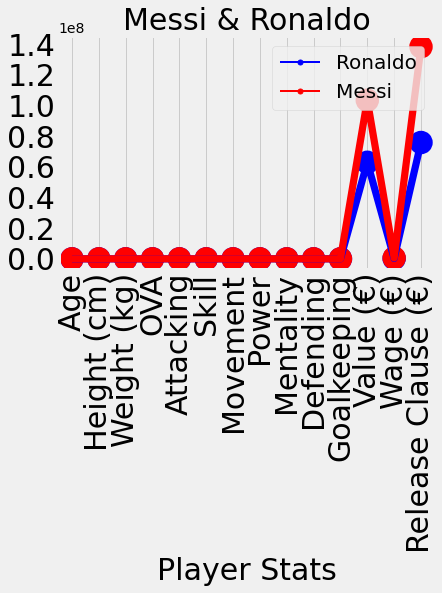

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# select data for Messi and Ronaldo
cc = player_stats[player_stats['Name'] == 'L. Messi']
cs = player_stats[player_stats['Name'] == 'Cristiano Ronaldo']

# create the pointplot for each player
sns.pointplot(data=cs, color='b')
sns.pointplot(data=cc, color='r')

# add title and axis labels
plt.title('Messi & Ronaldo', fontsize=30)
plt.xticks(rotation=90, fontsize=30)
plt.xlabel('Player Stats', fontsize=30)
plt.yticks(fontsize=30)
plt.grid()

# add legend with colors for each player
legend_labels = ['Ronaldo', 'Messi']
handles = [plt.Line2D([], [], color = 'blue', marker = '.', markersize = 10, linewidth = 2),
           plt.Line2D([], [], color = 'red', marker = '.', markersize = 10, linewidth = 2)]

plt.legend(handles = handles, labels = legend_labels, loc = 1 , fontsize = 20)


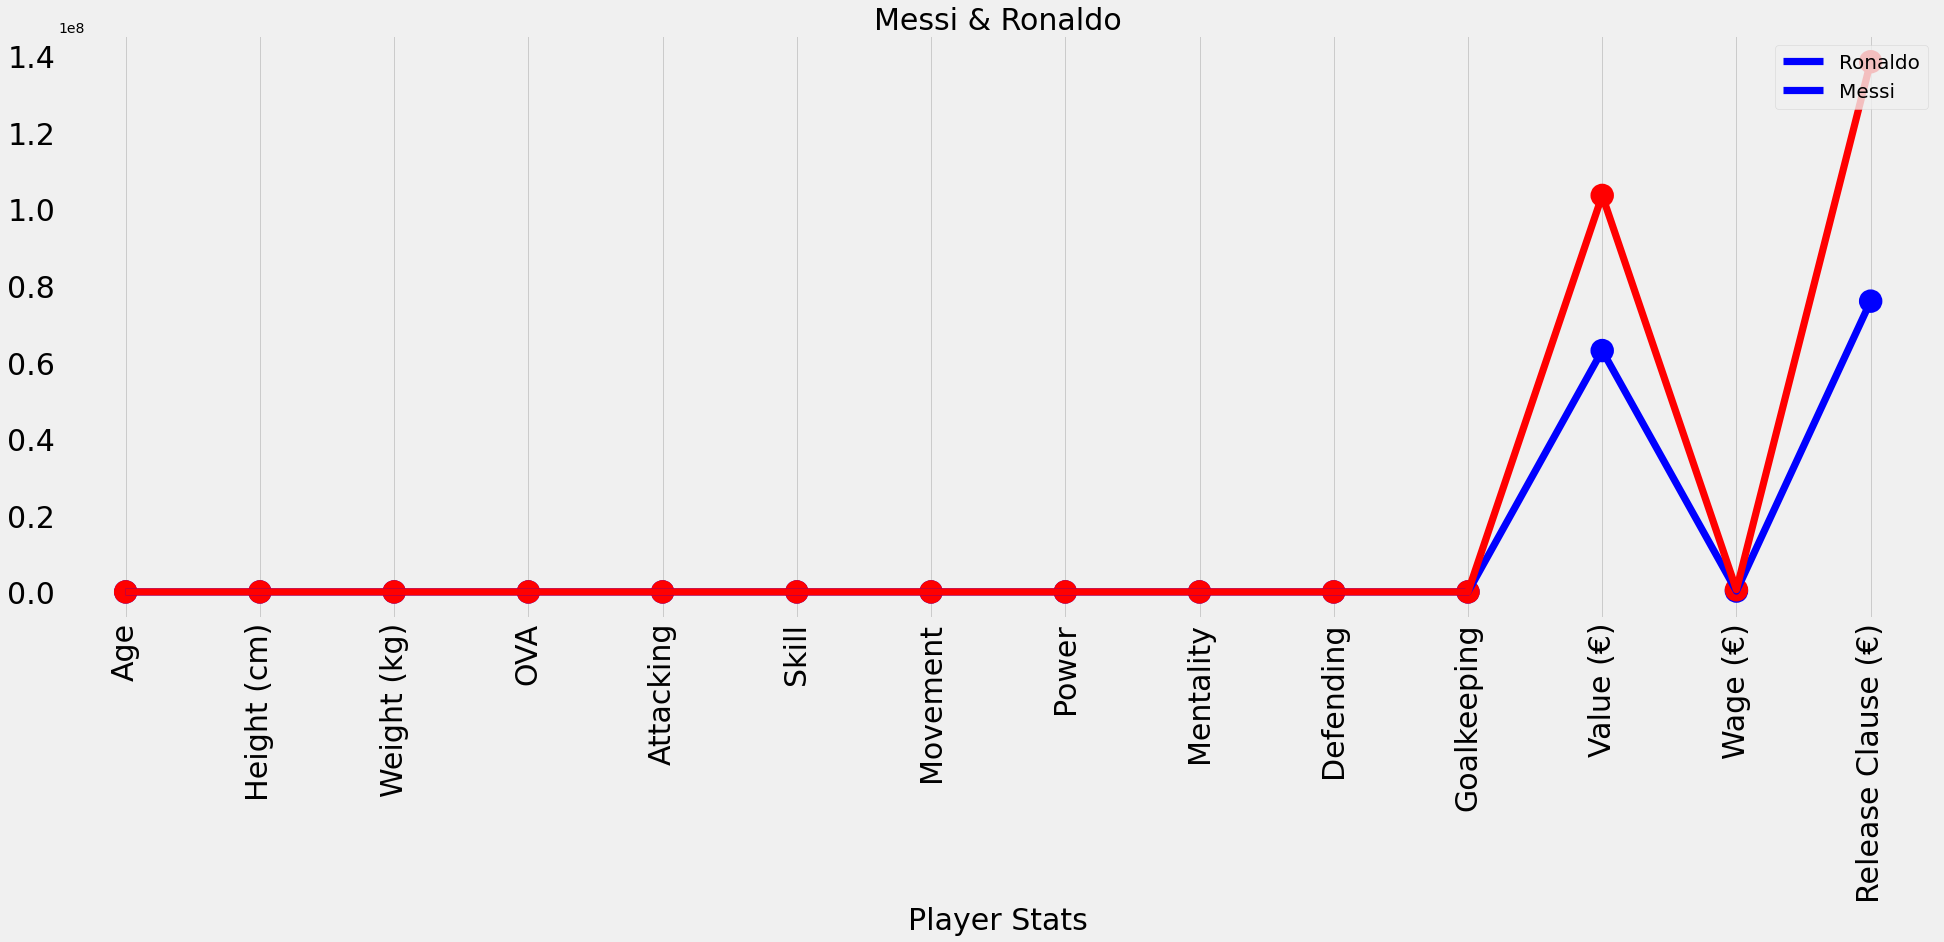

In [40]:
plt.figure(figsize = (30,10))

cc = player_stats[player_stats['Name'] == 'L. Messi']
cs = player_stats[player_stats['Name'] == 'Cristiano Ronaldo']
ax =sns.pointplot(data = cs, color = 'b' )
ax =sns.pointplot(data = cc, color = 'r')

plt.title('Messi & Ronaldo', fontsize = 30)
plt.xticks(rotation = 90, fontsize = 30)
plt.xlabel('Player Stats', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid()

# Add legend
plt.legend(handles=[ax.lines[0], ax.lines[0]], labels=['Ronaldo', 'Messi'], loc='upper right', fontsize=20)



In [ ]:
# Create some sample data for the bar plots
x = ['A', 'B', 'C', 'D', 'E']
y1 = [10, 5, 20, 8, 12]
y2 = [8, 12, 15, 6, 9]

# Set the width of each bar
bar_width = 0.35

# Set the x-axis locations of the bars
bar_positions1 = np.arange(len(x))
bar_positions2 = bar_positions1 + bar_width

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the first bar plot
ax.bar(bar_positions1, y1, width=bar_width, label='Bar Plot 1')

# Plot the second bar plot
ax.bar(bar_positions2, y2, width=bar_width, label='Bar Plot 2')

# Set the x-axis labels
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(x)

# Set the y-axis label
ax.set_ylabel('Y Label')

# Add a legend
ax.legend()

# Show the plot
plt.show()
